In [548]:
import numpy as np
import random


class GradientDescent():
    
    """Descent gradient class with regularize technique
    
    Parameters
    ----------
    regularize : bool
        If True, the regularization is used.
    bias : bool
        If the True, a bias is added to the features.
    alpha : float > 0
        Coefficient for the step when updating the parameters.
    
    Notes
    -----
    This class aims at computing the parameters of a linear model using
    a descent gradient method with or without regularization.
    """
    
    def __init__(self, regularize=False, bias=True, alpha=3e-9, iterations=30000):
        self.bias = bias
        if alpha < 0:
            raise ValueError('Alpha parameter must be > 0. Here {}.'.format(alpha))
        self.alpha = alpha
        self.iterations = iterations
        self.regularize = regularize
        
        #set the epsilon value depending on the regularize case
        if regularize:
            self.epsilon = 1e-10
        else:
            self.epsilon = 1e-8
    
    def predict(self, new_features):
        """Make predictions using the result of the gradient descent
        
        Parameters
        ----------
        new_features : 2d sequence of float
            The feature for which to predict the labels.
            
        Returns
        -------
        predicted_labels : 2d sequence of float
            The predicted labels
        
        Notes
        -----
        The method fit must be called first.
        """
        
        if self.bias:
            new_features = self._add_bias(new_features)
        return self.hypothesis(new_features, self.parameters_)
    
    
    def fit(self, features, label, parameters=None):
        """Find the optimal parameters
        
        Parameters
        ----------
        features : 2d sequence of float
            The input parameters.
        label : 2d sequence of float
            The output parameters
        parameters : 2d sequence of float
            The initial guess for the descent gradient.
        """
        # add bias or not
        if self.bias:
            features = self._add_bias(features)
        
        # if no initial parameters are given get some randomly
        if parameters is None:
            n = features.shape[1]
            parameters = np.random.rand(n,1)
    
        # compute the initial prediction
        predictions = self.hypothesis(features, parameters)
        
        # solve depending of the regularization or not
        self.parameters_ = self._regularize_fit(features, label, parameters, predictions)
#         if self.regularize:
#             self.parameters_ = self._regularize_fit(features, label, parameters, predictions)
#         else:
#             self.parameters_ = self._classic_fit(features, label, parameters, predictions)
         
        
#     def _classic_fit(self, features, label, parameters, predictions):
#         """Find the optimal parameters with classical method
#         """

#         costFct = 0
#         costFctEvol = []
#         count = 0
#         # On utilise une boucle while
#         while self.testRegCostFct(predictions, label, parameters, costFct, self.epsilon):
#             count += 1
#             costFct = self.costFunction(predictions, label)
#             grads = self.gradients(predictions, label, features)
#             parameters = self.updateParameters(parameters, grads, self.alpha)
#             predictions = self.hypothesis(features, parameters)
#             costFctEvol.append(costFct)
            
#         plt.xlabel('Iterations')
#         plt.ylabel('Fonction cout')
#         plt.title('Evolution de la fonction cout en fonctions des iterations')
#         plt.plot(costFctEvol)
#         return parameters
    
    def _regularize_fit(self, features, label, parameters, predictions):
        """Find the optimal parameters with regularized method
        """

        m = features.shape[0]
        
        lmb1 = 0.2
        if self.regularize == False:
            lmb1 = 0
        lmb2 = 0
        
        if self.regularize == 'rigde':
            lmb2 = 0
        if self.regularize == 'lasso':
            lmb2 = 1
        if self.regularize == 'elastic-net':
            lmb2 = 0.4
        print('lambda 1 est ',lmb1)
        print('lambda 2 est ',lmb2)
        
        
        costFct = 0
        costFctEvol = []
        count = 0
        while self.testRegCostFct(predictions, label, lmb1, lmb2, parameters, costFct, self.epsilon):
            count += 1
            costFct = self.regCostFunction(predictions, label, lmb1, lmb2, parameters)
            grads = self.regGradients(predictions, label, features, lmb1, lmb2, parameters)
            parameters = self.updateParameters(parameters, grads, self.alpha)
            predictions = self.hypothesis(features, parameters)
            costFctEvol.append(costFct)
            
        plt.xlabel('Iterations')
        plt.ylabel('Fonction cout')
        plt.title('Evolution de la fonction cout en fonctions des iterations')
        plt.plot(costFctEvol)
        return parameters
    
    def _add_bias(self, features):
        """Add bias column (1 vector)
        """
        bias = np.ones(features.shape[0])
        return np.column_stack([features, bias])
        
    def hypothesis(self, x, theta):
        """Compute our hypothesis model (linear regression), use a fonction:
        """
        return np.dot(x, theta)
    
    def costFunction(self, yhat, y):
        """Fonction de coût
        """
        return np.square(yhat - y).sum() / (2*y.shape[0])
    
    def regCostFunction(self, yhat, y, lmb1, lmb2, theta):
        """Fonction de coût régularisée
        """
        return self.costFunction(yhat, y) + lmb1/((2*y.shape[0]) * np.square(theta)).sum()


        return self.costFunction(yhat, y) + lmb1*(((1-lmb2)/2) * np.square(theta).sum() + lmb2(np.abs(theta)).sum())
    
    def gradients(self, yhat, y, x):
        """Dérivée de la fonction de coût == gradients
        """
        
        return (((yhat - y) * x).sum(axis=0) / x.shape[0]).reshape(x.shape[1],1)

    def regGradients(self, yhat, y, x, lmb1 ,lmb2 , theta):
        """Dérivée de la fonction de coût regularisée
        """
        #return (((yhat - y) * x).sum(axis=0) / x.shape[0]).reshape(x.shape[1],1) + lmb1/x.shape[0]*theta

        return (((yhat - y) * x).sum(axis=0) / x.shape[0]).reshape(x.shape[1],1) + (lmb1*(1-lmb2))/x.shape[0]*theta
    
    def updateParameters(self, parameters, grads, alpha):
        """Gradient descent: mise à jour des paramètres
        """
        return parameters - alpha * grads

#     def testCostFct(self, yhat, y, prevCostFct, epsilon):
#         """ Fonction pour tester l'évolution de la fonction de coût: vrai = continuer la descente de gradient
#         """
#         return np.abs(self.costFunction(yhat, y) - prevCostFct) >= epsilon*prevCostFct
    
    def testRegCostFct(self, yhat, y, lmb1, lmb2, theta, prevCostFct, epsilon):
        """ Fonction pour tester l'évolution de la fonction de coût régularisée
            
            Returns
            -------
            test : bool
                vrai = continuer la descente de gradient
        """
        return np.abs(self.regCostFunction(yhat, y, lmb1, lmb2, theta) - prevCostFct) >= epsilon*prevCostFct
    
    def train_test_split(self, X, y, ratio=0.3, random_seed = 42):
        """ Fonction pour subdiviser les donnees en donnees d'entrainement et donnees de test.
        
             Parametres
            ----------
            X : 2d sequence of float
                The input parameters.
            y : 2d sequence of float
                The output parameters
            ratio : La ratio du test set.
            
            Returns
            -------
            X_train : les features d'entrainement.
            y_train : les labels d'entrainement.
            X_test : les features de test.
            y_test : les labels de test.
            
        """
        X_train = []
        y_train = []
        X_test = []
        y_test = []
        rows = len(X)
        random.seed(random_seed)
        test_index = random.sample(range(0,rows), int(rows*ratio))
        for i in range(rows):
            if i in test_index:
                X_test.append(X[i])
                y_test.append(y[i])
            else:
                X_train.append(X[i])
                y_train.append(y[i])
        return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)
    
    def mae(self, y, y_pred) :
        return np.abs(y_pred - y).sum() / (2*y.shape[0])
    
    def rmse(self, y, y_pred) :
        return np.sqrt(np.square(y_pred - y).sum() / (2*y.shape[0]))
    
    def r2_score(self, y, y_pred) :
        return 1 - (np.square(y_pred - y).sum() / np.square(y_pred - np.mean(y)).sum())
        

In [549]:
g = GradientDescent(regularize = False,alpha = 0.03, iterations = 100000)

In [550]:
import numpy as np 
import pandas as pd
np.random.seed(67)

In [551]:
X = 3 * np.random.rand(100, 1) - 2
Y = 2*X + 7 + np.random.randn(100, 1)

In [552]:
df  = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [553]:
# X, Y = df.drop(['median_house_value','ocean_proximity'], axis = 1), df['median_house_value']
# X = X.to_numpy()
# Y = Y.to_numpy()

In [554]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes.data
Y = diabetes.target

In [555]:
X.shape

(442, 10)

In [556]:
Y.shape

(442,)

In [557]:
Y = Y.reshape(-1,1)

In [558]:
X_train, y_train, X_test, y_test = g.train_test_split(X,Y,ratio=0.3,random_seed=44)

In [559]:
X_train.shape

(310, 10)

In [560]:
import matplotlib.pyplot as plt

In [561]:
#plt.figure()
#plt.scatter(X_train,y_train,alpha = 0.7)
#plt.xlabel('Features')
#plt.ylabel('Labels')

lambda 1 est  0
lambda 2 est  0


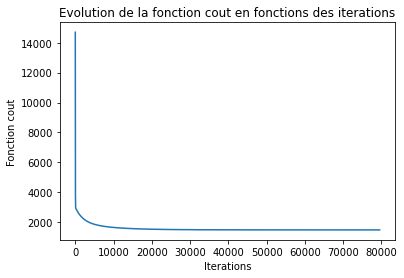

In [562]:
g.fit(X_train,y_train)

In [563]:
slope , intercept = g.parameters_[0][0],  g.parameters_[1][0]

In [564]:
g.parameters_

array([[ -24.62964016],
       [-270.20699139],
       [ 503.99845827],
       [ 362.05664109],
       [ -50.43939899],
       [-125.41491857],
       [-219.99094666],
       [ 127.55652776],
       [ 456.86796959],
       [  42.1982876 ],
       [ 152.01849369]])

In [503]:
slope

-23.956732609451507

In [504]:
# plt.figure()
# plt.scatter(X,Y,alpha = 0.7)
# plt.plot(X,X*slope+intercept, color = 'red')
# plt.xlabel('Features')
# plt.ylabel('Labels')

In [505]:
y_pred = g.predict(X_test)

In [506]:
g.r2_score(y_pred, y_test)

0.5323630598946936

In [507]:
y_test.shape

(132, 1)

In [508]:
y_pred.shape

(132, 1)

In [509]:

def generateXvector(X):
    """ Taking the original independent variables matrix and add a row of 1 which corresponds to x_0
        Parameters:
          X:  independent variables matrix
        Return value: the matrix that contains all the values in the dataset, not include the outcomes values 
    """
    vectorX = np.c_[np.ones((len(X), 1)), X]
    return vectorX

def theta_init(X):
    """ Generate an initial value of vector θ from the original independent variables matrix
         Parameters:
          X:  independent variables matrix
        Return value: a vector of theta filled with initial guess
    """
    theta = np.random.randn(len(X[0])+1, 1)
    return theta

def Multivariable_Linear_Regression(X,y,learningrate, iterations):
    """ Find the multivarite regression model for the data set
         Parameters:
          X:  independent variables matrix
          y: dependent variables matrix
          learningrate: learningrate of Gradient Descent
          iterations: the number of iterations
        Return value: the final theta vector and the plot of cost function
    """
    y_new = np.reshape(y, (len(y), 1))   
    cost_lst = []
    vectorX = generateXvector(X)
    theta = theta_init(X)
    m = len(X)
    for i in range(iterations):
        gradients = 2/m * vectorX.T.dot(vectorX.dot(theta) - y_new)
        theta = theta - learningrate * gradients
        y_pred = vectorX.dot(theta)
        cost_value = 1/(2*len(y))*((y_pred - y)**2) #Calculate the loss for each training instance
        total = 0
        for i in range(len(y)):
            total += cost_value[i][0] #Calculate the cost function for each iteration
        cost_lst.append(total)
    plt.plot(np.arange(1,iterations),cost_lst[1:], color = 'red')
    plt.title('Cost function Graph')
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost')
    return theta

array([[153.27355153],
       [ 25.94860852],
       [ -0.72536156],
       [106.11410015],
       [ 85.95150756],
       [ 31.43669153],
       [ 20.14694185],
       [-65.82922992],
       [ 69.03924446],
       [100.96508083],
       [ 59.2680745 ]])

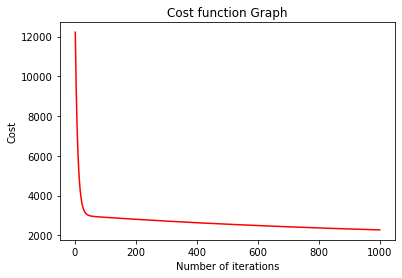

In [510]:
Multivariable_Linear_Regression(X_train, y_train, 0.03, 1000)

In [511]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target